## TECHIN 513 HW1 – Modifying Signals

Ghea C Suyono

### Assignment 4: Time Shift Operation

In [2]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy.signal as sig
import simpleaudio as sa

In [3]:
# Import the audio file
fs1, x1 = wav.read('sounds/train32.wav')
t_x1 = (np.arange(0, len(x1), 1))/fs1


#### Part A

1. Create a function called timeshift with parameters x, fs and t0 (in seconds)
2. Time shifting signal x(t) by a time t(0) results in new signal y(t)= x(t+t0)
3. The output is the portion of shifted signal starting at time 0 (Assume that the original signal has value 0 outside the time window)

In [4]:
# 1. Create timeshift function
# t0 is the time shift in seconds
# We need to convert t0 to discrete samples (n0) -> zero n0 (no time shifting), positive n0 (delay), negative n0 (advance)

def timeshift(x, fs, t0):
    # Convert t0 to n0
    n0 = int(t0*fs)
    
    #2 Check if n0 is positive or negative
    if n0 < 0: 
        # Advance - shifting to the left
        # Remove the first n0 samples and add n0 zeros to the end
        y = np.concatenate((x[-n0:], np.zeros(-n0)))
        
    elif n0 > 0:
        # Delay - shifting to the right
        # Remove the last n0 samples and add n0 zeros to the beginning
        y = np.concatenate((np.zeros(n0), x[:-n0]))

    else:
        y = x
    #3. Create time vector of y
    t_y = (np.arange(0, len(y), 1)) / fs
    
    # Return y and t_y
    return y, t_y



#### Part B

In [5]:
# Use the timeshift function to create x1(t+0.5)
# Positive time shift
t0 = -0.5

x1_positive_shift, t_x1_positive_shift = timeshift(x1, fs1, t0)
print(x1_positive_shift)
print(t_x1_positive_shift)


# Use the timeshift function to create x1(t-2)
# Negative time shift
t0 = +2
x1_negative_shift, t_x1_negative_shift = timeshift(x1, fs1, t0)
print(x1_negative_shift)
print(t_x1_negative_shift)

# save the shifted signals as wav files
wav.write('sounds/train32_positive_shift.wav', fs1, x1_positive_shift.astype(np.int16))
wav.write('sounds/train32_negative_shift.wav', fs1, x1_negative_shift.astype(np.int16))

[391. 534. 667. ...   0.   0.   0.]
[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 1.57218750e+00
 1.57221875e+00 1.57225000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 1.99990625e+00
 1.99993750e+00 1.99996875e+00]


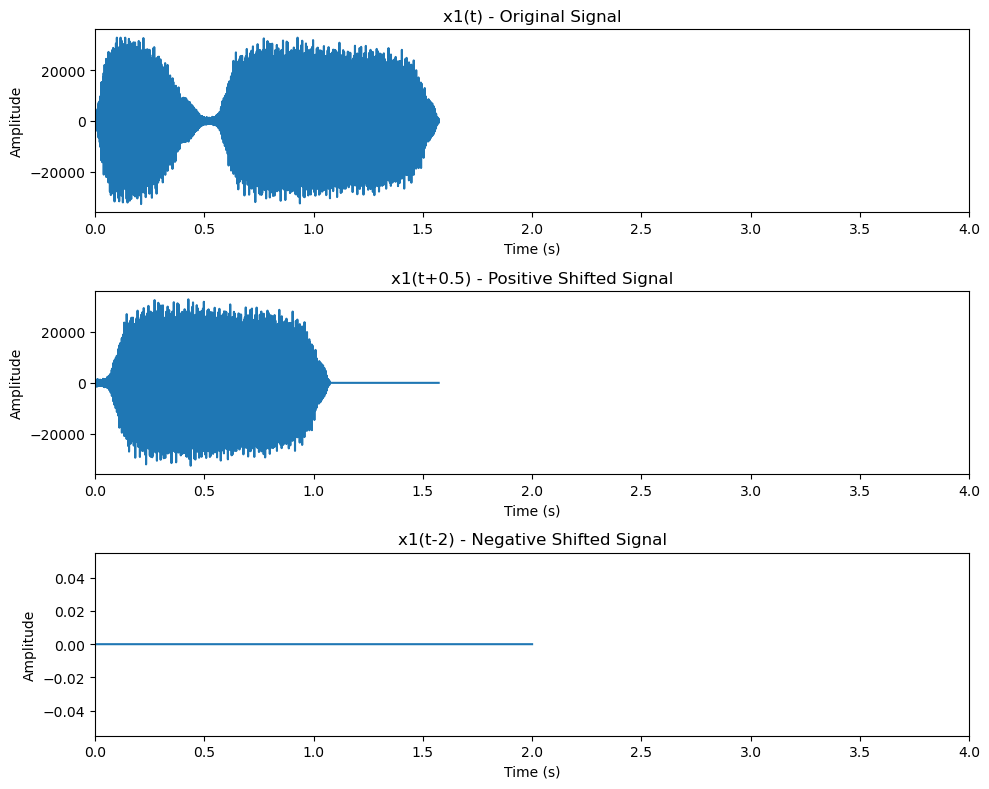

In [11]:
#Plot the shifted signals with the original in a 3x1 plot: x1(t), x1(t+0.5), and x1(t-2). 
plt.figure(figsize=(10, 8))

# 1. Define x axis limits
x_axis_range = [0,4]

# 2. First Original Signal
plt.subplot(3,1,1)
plt.plot(t_x1, x1)
plt.xlim(x_axis_range)  
plt.title('x1(t) - Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 3. Second Positive Shifted Signal
plt.subplot(3,1,2)
plt.plot(t_x1_positive_shift, x1_positive_shift)
plt.xlim(x_axis_range)
plt.title('x1(t+0.5) - Positive Shifted Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 4. Third Negative Shifted Signal
plt.subplot(3,1,3)
plt.plot(t_x1_negative_shift, x1_negative_shift)
plt.xlim(x_axis_range)
plt.title('x1(t-2) - Negative Shifted Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()  


#### Part C

Play all three signals using simple audio

In [7]:
def play_audio(file_path):
    wav_obj = sa.WaveObject.from_wave_file(file_path)
    play_obj = wav_obj.play()
    play_obj.wait_done()
    
# play the original signal
play_audio('sounds/train32.wav')
play_audio('sounds/train32_positive_shift.wav')
play_audio('sounds/train32_negative_shift.wav')
    

#### Report Discussion

The negative shift (t = 2) has no audio in place. The potential reason might be because the shift itself is bigger than the length of x.
